In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns

# Population and Sampling 

- Population : Large dataset or idea of dataset
- Sample : A subset of large dataset
- N : Number samples 
- Random Sampling : Drawing elements into sample set randomly
- Systematic Sampling : Drawing elements into sample set sytematically
- Stratified Sampling : Drawing elements into sample set based on strata
- Stratatum : A homogeneous subgroup of a population with common characteristics
- Bias : Systematic error

# Code: 
https://towardsdatascience.com/probability-sampling-with-python-8c977ad78664

In [10]:
filepath="/content/drive/MyDrive/Data Science/data/Class-8/500_Person_Gender_Height_Weight_Index.csv"
data=pd.read_csv(filepath)
data

#Store the real mean in a separate variable
real_mean = round(data['Height'].mean(),3)
print(real_mean)
data

169.944


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


# Random sampling

In [14]:
# Obtain simple random sample
simple_random_sample = data.sample(n=100).sort_index()

# Save the sample mean in a separate variable
simple_random_mean = round(simple_random_sample['Height'].mean(),3)
print(simple_random_mean)

# View sampled data frame
simple_random_sample

print(len(simple_random_sample[simple_random_sample["Gender"]=="Female"]))

170.5
58


# Systematic Sampling

In [13]:
def systematic_sampling(df, step):
    
    indexes = np.arange(0,len(df),step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample
    
# Obtain a systematic sample and save it in a new variable
systematic_sample = systematic_sampling(data, 5)

# Save the sample mean in a separate variable
systematic_mean = round(systematic_sample['Height'].mean(),3)
print(systematic_mean)

# View sampled data frame
systematic_sample

print(len(systematic_sample[systematic_sample["Gender"]=="Female"]))

170.51
50


# Stratified Sampling

In [20]:
# Set the split criteria
split = StratifiedShuffleSplit(n_splits=1, test_size=100)
print(split)

# Perform data frame split
for x, y in split.split(data, data['Gender']):
    stratified_random_sample = data.iloc[y]

# View sampled data frame

stratified_random_sample_mean = round(stratified_random_sample['Height'].mean(),3)
print(stratified_random_sample_mean)

# Obtain the sample mean for each group
stratified_random_sample.groupby("Gender").mean().drop(['Index'],axis=1)

stratified_random_sample
#stratified_random_sample[stratified_random_sample["Gender"]=="Female"]

StratifiedShuffleSplit(n_splits=1, random_state=None, test_size=100,
            train_size=None)
173.04


,Gender,Height,Weight,Index
103,Female,198,145,4
97,Male,160,139,5
121,Male,187,122,4
99,Female,190,50,0
359,Female,186,148,4
...,...,...,...,...
329,Female,185,102,3
311,Female,180,156,5
423,Female,178,107,4
426,Male,188,141,4


# Sampling error

In [21]:
# Create a dictionary with the mean outcomes for each sampling method and the real mean
outcomes = {'sample_mean':[simple_random_mean,systematic_mean,stratified_random_sample_mean],
           'population_mean':real_mean}

# Transform dictionary into a data frame
outcomes = pd.DataFrame(outcomes, index=['Simple Random Sampling','Systematic Sampling','Stratified Sampling'])

# Add a value corresponding to the absolute error
outcomes['abs_error'] = abs(outcomes['population_mean'] - outcomes['sample_mean'])

# Sort data frame by absolute error
outcomes.sort_values(by='abs_error')

,sample_mean,population_mean,abs_error
Simple Random Sampling,170.50,169.944,0.556
Systematic Sampling,170.51,169.944,0.566
Stratified Sampling,173.04,169.944,3.096


# Bias

In [22]:
data_f=data[data["Gender"]=="Female"]
data_f["Height"]=data_f["Height"]-20
data_m=data[data["Gender"]=="Male"]
data1=data_m.append(data_f)
data1

<ipython-input-22-cfe9143252a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f["Height"]=data_f["Height"]-20
<ipython-input-22-cfe9143252a9>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1=data_m.append(data_f)


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
...,...,...,...,...
492,Female,178,50,0
493,Female,150,53,1
495,Female,130,153,5
496,Female,164,121,4


<AxesSubplot:xlabel='Height', ylabel='Density'>

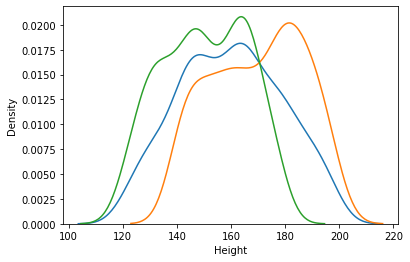

In [ ]:
sns.kdeplot(data=data1,x="Height")
sns.kdeplot(data=data_m,x="Height")
sns.kdeplot(data=data_f,x="Height")

In [25]:
df1=data1[data1["Gender"]=="Female"].sample(75)
df2=df1.append(data1[data1["Gender"]=="Male"].sample(25))
print("Sampled data mean: ",df2["Height"].mean())
print("Data mean: ",data1["Height"].mean())

Sampled data mean:  153.53
Data mean:  159.744


<ipython-input-25-5c1dbc7bb5b1>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df1.append(data1[data1["Gender"]=="Male"].sample(25))


In [ ]:
len(data_m)

245

# Real World Example of Bias
- Literary Digest poll of 1936 
https://en.wikipedia.org/wiki/The_Literary_Digest

- Regression to the Mean (Player Selection)
https://en.wikipedia.org/wiki/Regression_toward_the_mean

- Self-Selection Sampling Bias (i.e. online reviews)